Matilde Bernocchi, Francesco D'aleo, and Elena Ginebra

## Financial news categorization/sentiment analysis using NLP techniques


Sentiment analysis is the statistical analysis of simple sentiment
cues. Essentially, it involves making statistical analyses on polarized
statements (i.e., statements with a positive, negative and neutral sen
timent), which are usually collected in the form of social media posts,
reviews, and news articles. Financial sentiment analysis is a challenging task due to the specialized language and lack of labeled data in that domain.


In our case, we will focus on two different tasks.


1. **Category tagger**: Create a NLP classifier capable of assigning a financial category to a text derived from the financial industry.

The Twitter Financial News dataset is an English-language dataset containing an annotated corpus of finance-related tweets. This dataset is used to classify finance-related tweets for their topic.

    The dataset holds 21,107 documents annotated with 20 labels:

topics = {
    "LABEL_0": "Analyst Update",
    "LABEL_1": "Fed | Central Banks",
    "LABEL_2": "Company | Product News",
    "LABEL_3": "Treasuries | Corporate Debt",
    "LABEL_4": "Dividend",
    "LABEL_5": "Earnings",
    "LABEL_6": "Energy | Oil",
    "LABEL_7": "Financials",
    "LABEL_8": "Currencies",
    "LABEL_9": "General News | Opinion",
    "LABEL_10": "Gold | Metals | Materials",
    "LABEL_11": "IPO",
    "LABEL_12": "Legal | Regulation",
    "LABEL_13": "M&A | Investments",
    "LABEL_14": "Macro",
    "LABEL_15": "Markets",
    "LABEL_16": "Politics",
    "LABEL_17": "Personnel Change",
    "LABEL_18": "Stock Commentary",
    "LABEL_19": "Stock Movement"
}

2. **Sentiment tagger**: Create a NLP classifier capable of assigning a sentiment score (positive,negative,neutral) to text derived from the financial industry. Additionally, we will use a powerful pre-trained model, finetuned on financial data, to assign scores to financial headlines, data from social media posts, etc ...


## Pre-requisites:


High level requirements of Python library.

    - Pytorch
    - HuggingFace Transformers library
    - Pandas
    - Numpy
    - Sklearn
    

## **Step 1: Pulling the data together**


Download and inspect the data from the various sources:

1. Financial Phrasebank https://huggingface.co/datasets/financial_phrasebank. Humanly annotated

2. Financial tweets topics dataset: https://huggingface.co/datasets/zeroshot/twitter-financial-news-topic/viewer/default/train?p=169. Humanly annotated

Think of any pre-processing functions (
    Converting the text to lowercase,
    removing punctuation,
    tokenizing the text,
    removing stop words and empty strings,
    lemmatizing tokens.
) that you might need to apply for downstream tasks. As always, pick a framework for data analysis and data exploration.

In [ ]:
#!pip install datasets

In [ ]:
from datasets import load_dataset
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

In [ ]:
financial_phrasebank = load_dataset("financial_phrasebank", 'sentences_50agree')
train_data_finance = financial_phrasebank["train"]
twitter_financial = load_dataset("zeroshot/twitter-financial-news-topic")
train_data_twitter = twitter_financial["train"]

In [ ]:
train_data_finance[:5]

{'sentence': ['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .',
  'Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .',
  'The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .',
  'With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .',
  "According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."],
 'l

In [ ]:
train_data_twitter[:5]

{'text': ["Here are Thursday's biggest analyst calls: Apple, Amazon, Tesla, Palantir, DocuSign, Exxon &amp; more  https://t.co/QPN8Gwl7Uh",
  'Buy Las Vegas Sands as travel to Singapore builds, Wells Fargo says  https://t.co/fLS2w57iCz',
  'Piper Sandler downgrades DocuSign to sell, citing elevated risks amid CEO transition  https://t.co/1EmtywmYpr',
  "Analysts react to Tesla's latest earnings, break down what's next for electric car maker  https://t.co/kwhoE6W06u",
  'Netflix and its peers are set for a ‘return to growth,’ analysts say, giving one stock 120% upside  https://t.co/jPpdl0D9s4'],
 'label': [0, 0, 0, 0, 0]}

In [ ]:
import nltk
nltk.download('wordnet')

def convert_to_lower(text):
    if text is None:
        return ""
    return text.lower()

def remove_punct(text):
    if text is None:
        return ""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenise(text):
    if text is None:
        return ""
    return word_tokenize(text)

def remove_stop_words(tokens):
    if tokens is None:
        return ""
    return [word for word in tokens if word.lower() not in set(stopwords.words('english'))]

def remove_empty_strings(tokens):
    if tokens is None:
        return ""
    return [token for token in tokens if token.strip()]

def lemmatise(tokens):
    if tokens is None:
        return ""
    return [WordNetLemmatizer().lemmatize(token) for token in tokens]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def cleaning_text(text):
    if text is None:
        return []

    text = convert_to_lower(text)
    text = remove_punct(text)
    token = tokenise(text)
    token = remove_stop_words(token)
    token = remove_empty_strings(token)
    token = lemmatise(token)
    return token

In [ ]:
#convert in dataframe
train_data_finance = pd.DataFrame(train_data_finance)

#process sentences
train_data_finance['proc_sentence'] = train_data_finance['sentence'].apply(cleaning_text)

In [ ]:
train_data_finance[:5]

,sentence,label,proc_sentence
0,"According to Gran , the company has no plans t...",1,"[according, gran, company, plan, move, product..."
1,Technopolis plans to develop in stages an area...,1,"[technopolis, plan, develop, stage, area, le, ..."
2,The international electronic industry company ...,0,"[international, electronic, industry, company,..."
3,With the new production plant the company woul...,2,"[new, production, plant, company, would, incre..."
4,According to the company 's updated strategy f...,2,"[according, company, updated, strategy, year, ..."


In [ ]:
#convert in dataframe
train_data_twitter = pd.DataFrame(train_data_twitter)

#process sentences
train_data_twitter['proc_text'] = train_data_twitter['text'].apply(cleaning_text)

In [ ]:
train_data_twitter[:5]

,text,label,proc_text
0,Here are Thursday's biggest analyst calls: App...,0,"[thursday, biggest, analyst, call, apple, amaz..."
1,Buy Las Vegas Sands as travel to Singapore bui...,0,"[buy, la, vega, sand, travel, singapore, build..."
2,"Piper Sandler downgrades DocuSign to sell, cit...",0,"[piper, sandler, downgrade, docusign, sell, ci..."
3,"Analysts react to Tesla's latest earnings, bre...",0,"[analyst, react, tesla, latest, earnings, brea..."
4,Netflix and its peers are set for a ‘return to...,0,"[netflix, peer, set, ‘, return, growth, ’, ana..."


## **Step 2: Train and fine-tune various NLP classifiers on financial news datasets**



#### **2.1 Let´s start with simple baseline (at your own choice)**. For example, build a logistic regression model based on pre-trained word embeddings or TF-IDF vectors of the financial news corpus **


Build a baseline model  with **Financial Phrasebank dataset**. What are the limitations of these baseline models?


#### **2.2 Compare the baseline with a pre-trained model that is specialized for the finance domain. Download and use the FinBERT model from Huggingfaces**

Model source: https://huggingface.co/ProsusAI/finbert

Once you have downloaded the model, run inference and compute performance metrics to get a sense of how the specialized pre-trained model fares against the baseline  model.  Use the HuggingFaces library to download the model and run inference on it. For large datasets or text sequences, CPU running time might be large.

For more information on the model: Araci, D. (2019). FinBERT: Financial Sentiment Analysis with Pre-trained Language Models.

#### **2.3 (Advanced) Fine-tune a pre-trained model such a base BERT model on a small labeled dataset**

General-purpose models are not effective enough because of the specialized language used in a financial context. We hypothesize that pre-trained language models can help with this problem because they require fewer labeled examples and they can be further trained on domain-specific corpora.

In recent years the NLP community has seen many breakthoughs in Natural Language Processing, especially the shift to transfer learning. Models like ELMo, fast.ai's ULMFiT, Transformer and OpenAI's GPT have allowed researchers to achieves state-of-the-art results on multiple benchmarks and provided the community with large pre-trained models with high performance. This shift in NLP is seen as NLP's ImageNet moment, a shift in computer vision a few year ago when lower layers of deep learning networks with million of parameters trained on a specific task can be reused and fine-tuned for other tasks, rather than training new networks from scratch.

One of the most significant milestones in the evolution of NLP recently is the release of Google's BERT, which is described as the beginning of a new era in NLP. In our case, we are going to explore a pre-trained model called FinBERT, already tuned with a financial corpus. I specifically recommend the HuggingFace library for easeness of implementation.

*What is HuggingFace?* Hugging Face’s Transformers is an open-source library that provides thousands of pre-trained models to perform various tasks on texts such as text classification, named entity recognition, translation, and more. The library has a unified, high-level API for these models and supports a wide range of languages and model architectures.


Here are various tutorials for finetuning BERT: https://drlee.io/fine-tuning-hugging-faces-bert-transformer-for-sentiment-analysis-69b976e6ac5d and https://skimai.com/fine-tuning-bert-for-sentiment-analysis/. I specially recommnend this one: http://mccormickml.com/2019/07/22/BERT-fine-tuning/

The dataset where to finetune a BERT related model can be found in the previous cell: **Financial tweets topics dataset**

*ALERT*: Running or training a large language model like BERT or FinBERT might incur in large CPU processing times. Although BERT is very large, complicated, and have millions of parameters, we might only need to fine-tune it in only 2-4 epochs. You can also explore Google colab, for limited acces to free GPUs, which might best suited for this task., specially if training required.

Finally, compare the previous baseline with fine-tuned FinBERT

In [ ]:
#2.1 Logistic Regression on TF-IDF vectors of the Financial Phrasebank dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = train_data_finance['proc_sentence']
y = train_data_finance['label']

# Convert series X into a list of strings
X_list = [' '.join(words) for words in X]

X_train, X_test, y_train, y_test = train_test_split(X_list, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_tfidf, y_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)
y_pred = logistic_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(accuracy)
print(classification_rep)

0.7391752577319588
              precision    recall  f1-score   support

           0       0.78      0.43      0.55       110
           1       0.73      0.95      0.82       571
           2       0.77      0.45      0.57       289

    accuracy                           0.74       970
   macro avg       0.76      0.61      0.65       970
weighted avg       0.75      0.74      0.72       970



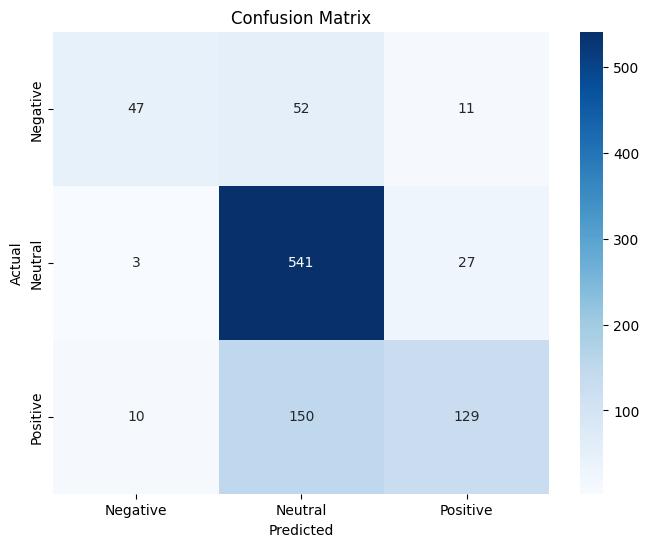

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

COMMENT:

From the results obtained with the logistic regression for the prediction of the "label" variable (which represents the negative, neutral and positive categories), using the "sentence" variable as a predictor, we observe that:

Precision:
Measures the proportion of positive instances correctly predicted out of all instances predicted as positive.
- class 0 (negative): 78% of the instances classified as negative are actually negative.
- class 1 (neutral): 73% of the instances classified as neutral are actually neutral.
- class 2 (positive): 77% of the instances classified as positive are actually positive.

Recall:
It measures the proportion of positive instances that were correctly predicted out of the total number of actually positive instances.
- class 0 (negative): only 43% of all negative instances were correctly identified as negative.
- class 1 (neutral): 95% of all neutral instances were correctly identified as neutral.
- class 2 (positive): only 45% of all positive instances were correctly identified as positive.

F1-score:
= Harmonic mean of precision and recall.
It is an overall measure of the model's ability to make accurate predictions for all classes.
- class 0 (negative): F1-score = 55%.
- class 1 (neutral): F1-score = 82%.
- class 2 (positive): F1-score = 57%.

Support = number of instances in the real class.

Accuracy:
Measures the proportion of correctly classified instances out of the total instances in the dataset.
In this case 74% of all instances were classified correctly.

Macro Avg = unweighted average of the evaluation metrics (precision, recall, F1-score) for all classes.
In this case, the macro avg of precision, recall, and F1-score is 76%, 61%, and 65%, respectively.

Weighted Avg: = weighted average of the evaluation metrics (precision, recall, F1-score) for all classes, weighted by the support of each class.
In this case, the weighted avg of precision, recall, and F1-score is 75%, 74%, and 72%, respectively.

In general, the results indicate that the model has a good ability to correctly predict neutral instances (class 1),
but it has lower performance in predicting negative (class 0) and positive (class 2) instances, especially in terms of recall.
This may indicate that the model is having difficulty correctly distinguishing negative and positive instances from neutral ones.

Limitations of this basic model may include the lack of consideration of the deeper semantics of sentences and the specificity limited to the financial context.

Having no other features available in the dataframe to use as predictors, we decide to try another model: Random Forest Classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_model.fit(X_train_tfidf, y_train)

y_pred_rf = random_forest_model.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_rep_rf)

Accuracy: 0.756701030927835
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.45      0.57       110
           1       0.75      0.96      0.84       571
           2       0.80      0.48      0.60       289

    accuracy                           0.76       970
   macro avg       0.77      0.63      0.67       970
weighted avg       0.76      0.76      0.74       970



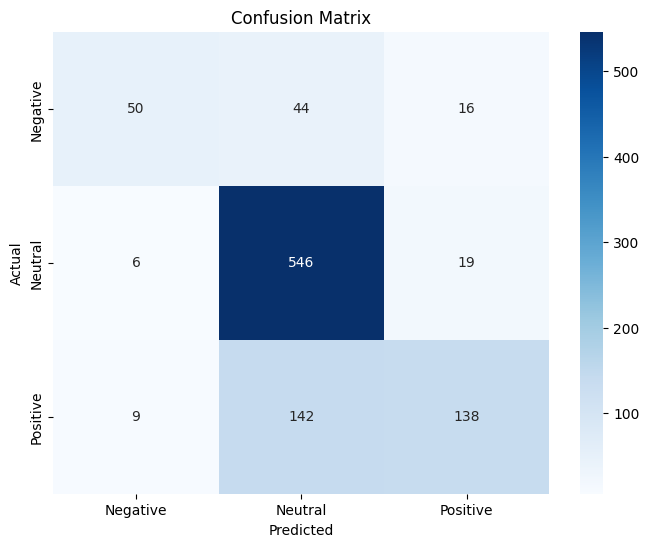

In [ ]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The results indicate that the model performed well in class “1” (with an F1 score of approximately 0.84), while the performance in classes “0” and “2” was slightly lower.
Overall, the Random Forest model seems to improve slightly over logistic regression, especially when it comes to the overall F1 score.

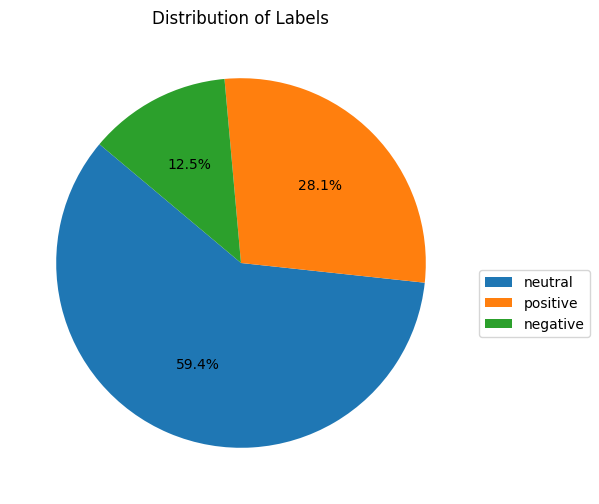

In [ ]:
label_counts = train_data_finance['label'].map({0: 'negative', 1: 'neutral', 2: 'positive'}).value_counts(normalize=True)

plt.figure(figsize=(8, 6))
pie = plt.pie(label_counts, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.legend(label_counts.index, loc="best", bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
#2.2 FinBERT

For memory and RAM issues, we implement the finBERT model on the dataset Sentences_AllAgree.txt

In [ ]:
#!pip install torch torchvision torchaudio

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load the model and tokenizer
model_name = "ProsusAI/finbert"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
file = "Sentences_AllAgree.txt" #Sentences_50Agree
df_finance = pd.read_csv(file, sep="@", encoding="iso-8859-1", header=None)
df_finance = df_finance.rename(columns={0: 'sentence', 1: 'label'})

In [ ]:
# Features and target
X = df_finance['sentence']
y = df_finance['label']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import torch

def sentiment_FINBERTprediction(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)

    return torch.argmax(probs, dim=1).numpy()

In [ ]:
# Predict sentiments for the test set
test_preds = [sentiment_FINBERTprediction(text, tokenizer, model)[0] for text in X_test]

# Apply the prediction function to text data
df_finance['Predicted_Sentiment'] = df_finance['sentence'].apply(lambda x: sentiment_FINBERTprediction([x], tokenizer, model))

In [ ]:
label_map = {0: 'positive', 1: 'negative', 2: 'neutral'}

In [ ]:
# Mappa le etichette predette utilizzando il dizionario label_map
test_preds_mapped = [label_map[pred] for pred in test_preds]

# Aggiorna la colonna 'Predicted_Sentiment' con le etichette mappate sul set di test
df_finance.loc[y_test.index, 'Predicted_Sentiment'] = test_preds_mapped

In [ ]:
accuracy = accuracy_score(y_test, test_preds_mapped)
report = classification_report(y_test, test_preds_mapped)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9764705882352941
Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.99      0.95        87
     neutral       1.00      0.98      0.99       417
    positive       0.97      0.97      0.97       176

    accuracy                           0.98       680
   macro avg       0.96      0.98      0.97       680
weighted avg       0.98      0.98      0.98       680



The model trained with FinBERT has very high performance in classifying sentences based on their sentiment.

The 'negative' class has an accuracy of 91%, meaning that approximately 91% of the sentences classified as negative are actually negative. Furthermore, the recall is 99%, which indicates that the model can correctly identify the majority of negative sentences present in the test dataset.

For the 'neutral' class, the model achieved 100% accuracy, meaning that all sentences classified as neutral are correct. The recall is 98%, which indicates that the model is able to correctly identify the majority of neutral sentences.

The 'positive' class has an accuracy of 97% and a recall of 97%, which indicates that the model is as good at recognizing positive sentences as it is for negative and neutral sentences.

The overall accuracy of the model is 98%, which means that approximately 98% of the predictions made by the model are correct compared to the test dataset.

Classes are very unbalanced, so we can do class weighting, i.e. specify different weights for classes during training. In particular, greater weights will be assigned to the less represented classes to ensure that the model gives more importance to these classes during training.

We use the class_weight argument available from scikit-learn, which allows you to specify the weights to assign to each class when training the model.

In [ ]:
import torch
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=df_finance['label'].unique(), y=df_finance['label'])
class_weight_dict = {label: weight for label, weight in zip(df_finance['label'].unique(), class_weights)}

print("Weights of the classes:")
print(class_weight_dict)

Weights of the classes:
{'neutral': 0.5425353462736641, 'positive': 1.3239766081871345, 'negative': 2.4906490649064907}


In [ ]:
# Features and target
X = df_finance['sentence']
y = df_finance['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define class weights
class_weights = {0: 2.6743929359823397, 1: 0.5610744471459997, 2: 1.1851308388359012}

# Tokenize and encode the sentences for training and test sets
X_train_encoded = tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors="pt")
X_test_encoded = tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors="pt")

# Convert labels to tensor
label_map = {'positive': 0, 'negative': 1, 'neutral': 2}
y_train_tensor = torch.tensor([label_map[label] for label in y_train])
y_test_tensor = torch.tensor([label_map[label] for label in y_test])

# Define the loss function with class weights
loss_fn = torch.nn.CrossEntropyLoss(weight=torch.tensor(list(class_weights.values()), dtype=torch.float32))

# Define the optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

In [ ]:
# Train the model
model.train()
for epoch in range(3):  # example, adjust as needed
    optimizer.zero_grad()
    outputs = model(**X_train_encoded)
    loss = loss_fn(outputs.logits, y_train_tensor)
    loss.backward()
    optimizer.step()

In [ ]:
# RAM's issues

In [ ]:
# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(**X_test_encoded)
    test_preds = torch.argmax(outputs.logits, dim=1).tolist()

# Map predicted labels using the label_map dictionary
reverse_label_map = {v: k for k, v in label_map.items()}
test_preds_mapped = [reverse_label_map[pred] for pred in test_preds]

# Update the 'Predicted_Sentiment' column with the mapped labels on the test set
df_finance.loc[y_test.index, 'Predicted_Sentiment'] = test_preds_mapped

In [ ]:
accuracy = accuracy_score(y_test, test_preds_mapped)
report = classification_report(y_test, test_preds_mapped)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

## **Step 3: Deployment of the sentiment/category tagger on  financial news or social media posts**

Let´s now turn our attention to a live deployment of the financial news tagger. Things can get quite complicated, specially if we add streaming data, so it is best to keep the deploymnet lightweight. There are mainly three important pieces. Let´s explore them:


- Build a local dashboard/app (e.g. using Streamlit or another web applications framework of your choice). A bit UI to display the sentiment tagger in action and demonstrate the practical application of your model.


- Build a financial news/alerts scraper pipeline, filter some entities if you focus your search. In a real world setting,  you’d likely want to build a more robust infrastructure for processing and ingestion of new examples, handling any preprocessing, and outputting predictions. Here are some options where to scrape data (real-time data might be expensive or limited):

    - <span style="color:blue">*Social Media Posts*</span>: Pulling historical or live data from tweets or reddit. There are public APIs with extensive documentation for them.
    - <span style="color:blue">*OpenBB*</span>: Open research investment platform. It aggregates financial news across the world and has an API to access them.
    - <span style="color:blue">*Financial news outlet*</span>: Yahoo Finance
    
An pipeline example: The basic premise is to read in a stream of tweets, use a lighweight sentiment analysis engine (BERT might not be a good fit here) to assign a bullish/neutral/bearish score to each tweet, and then see how this cumulatively changes over time.
    
    
- Build an inference endpoint for the tagging model. Within your infrastructure, you can deploy and load the resuting model. One way is to build a REST API endpoint, only to be queried locally (in your laptop).



Extra: You could explore or quantify correlations with the market for a list of selected stock.